In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C://Datascience Projects/Python/Rsources/Car_sales.csv')

In [3]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [4]:
df.shape

(10000, 12)

### Exploratory data analysis   

In [5]:
df.dtypes

make_year               int64
mileage_kmpl          float64
engine_cc               int64
fuel_type              object
owner_count             int64
price_usd             float64
brand                  object
transmission           object
color                  object
service_history        object
accidents_reported      int64
insurance_valid        object
dtype: object

In [6]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


## Finding Null Valuess 

In [7]:
df.isna().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

- service_history column contains 2038 null_values 

### missing_values imputation

In [8]:
df['service_history'].fillna(df['service_history'].mode()[0],inplace=True) 

C:\Users\Chaitanya\AppData\Local\Temp\ipykernel_15828\151147996.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['service_history'].fillna(df['service_history'].mode()[0],inplace=True)


In [9]:
df['service_history'].isna().sum()

0

## Finding duplicates 

In [10]:
df.duplicated().sum()

0

## Checking and Reviewing DataFrame information 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     10000 non-null  object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


## Checking the general correlation between all columns and their relationshhips

In [12]:
# checking the .corr function to see the correlation between variables . closest to one 
corr = df.select_dtypes(exclude = 'object').corr()

In [13]:
corr

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
make_year,1.000000,-0.013167,-0.017912,-0.021550,0.432603,-0.005151
mileage_kmpl,-0.013167,1.000000,-0.003222,-0.008310,0.211971,0.004567
engine_cc,-0.017912,-0.003222,1.000000,-0.000358,0.678161,-0.007750
owner_count,-0.021550,-0.008310,-0.000358,1.000000,-0.262266,-0.009365
price_usd,0.432603,0.211971,0.678161,-0.262266,1.000000,-0.001461
accidents_reported,-0.005151,0.004567,-0.007750,-0.009365,-0.001461,1.000000


In [14]:
# visualization overview of relationships in the dataset 

<Axes: >

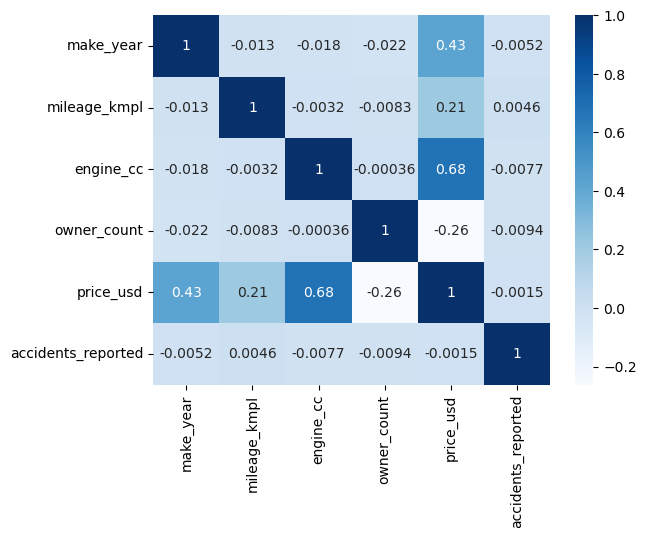

In [15]:
sns.heatmap(corr,annot=True, cmap = 'Blues') 

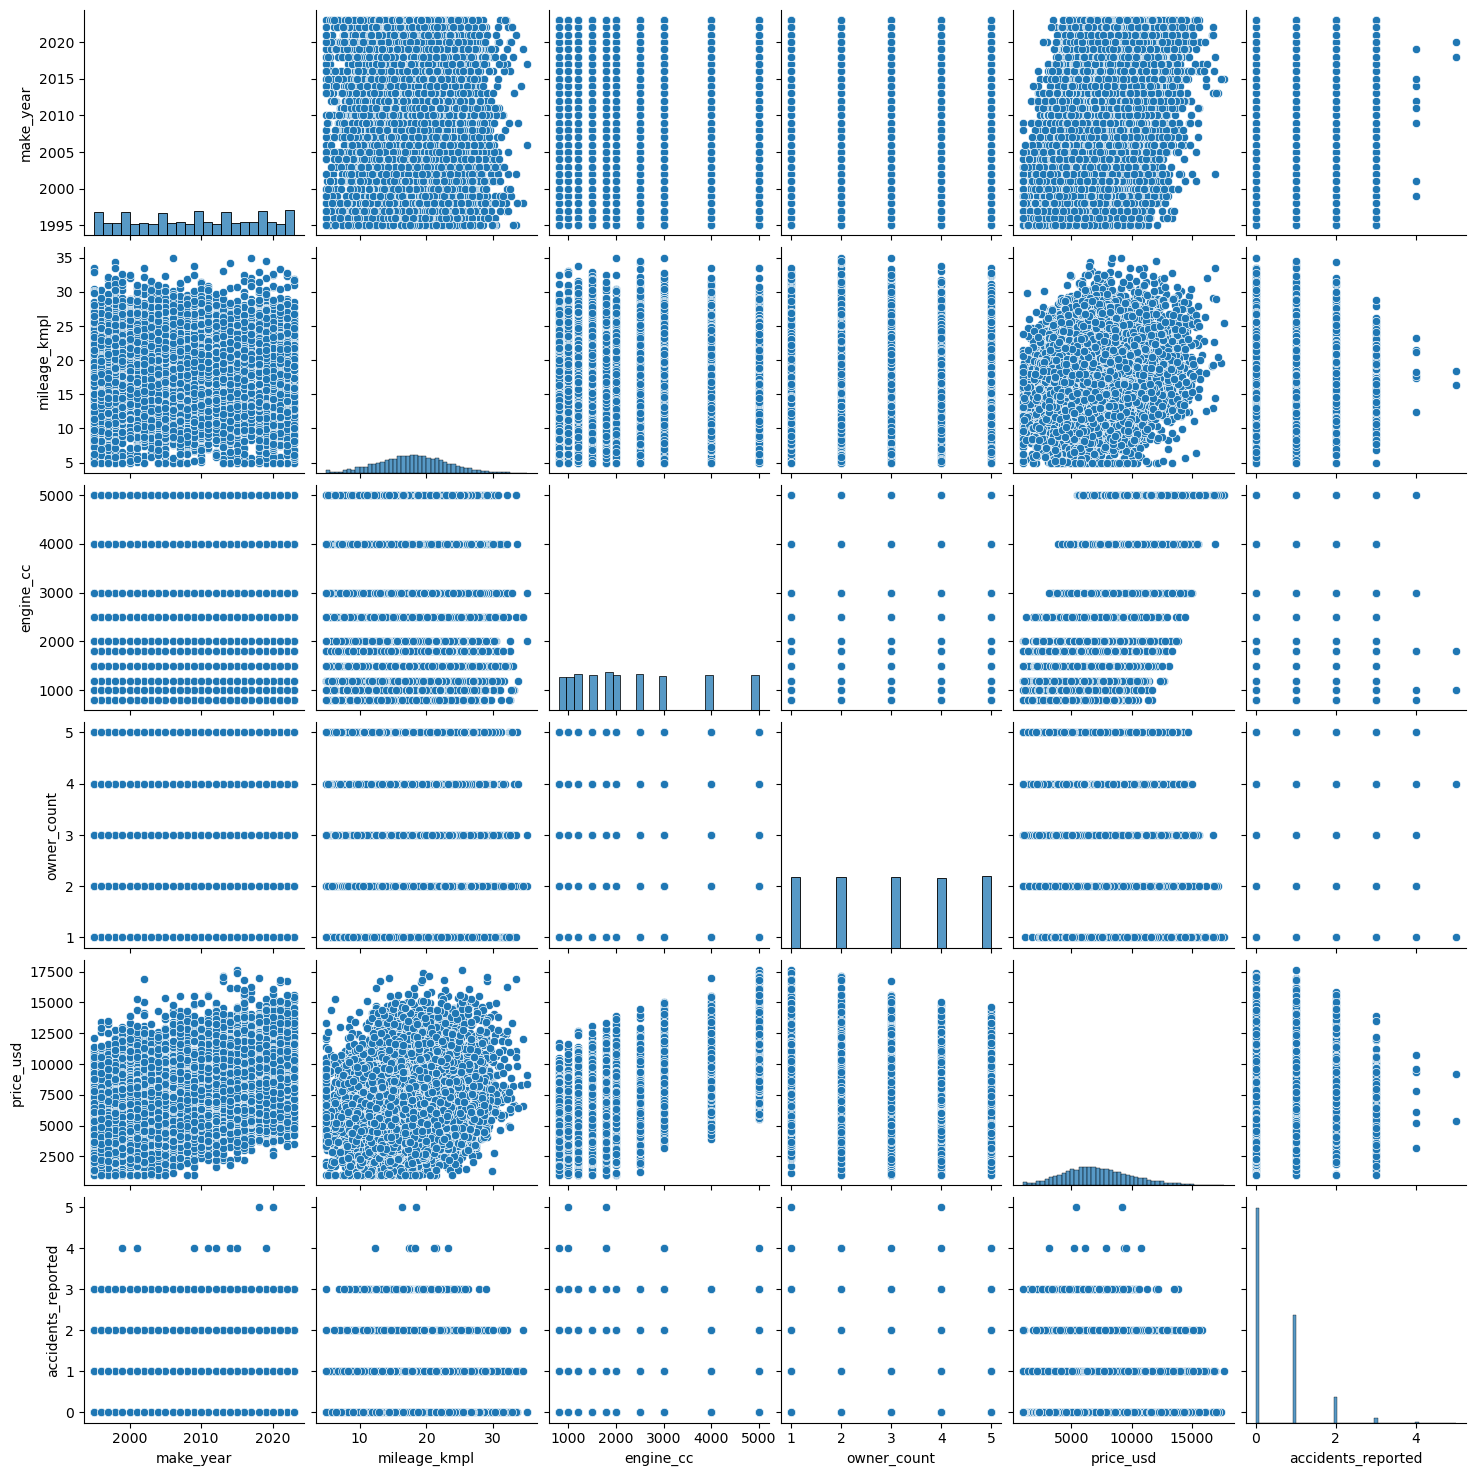

In [16]:
## Visualization overview of relationships in the dataset 
sns.pairplot(df)

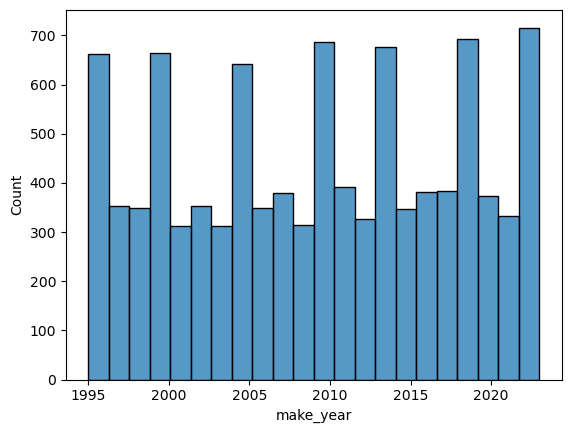

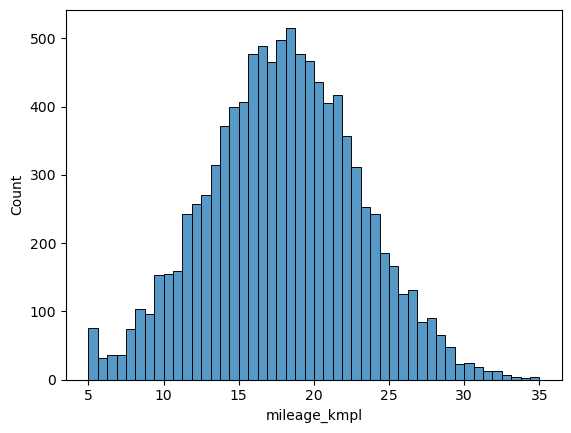

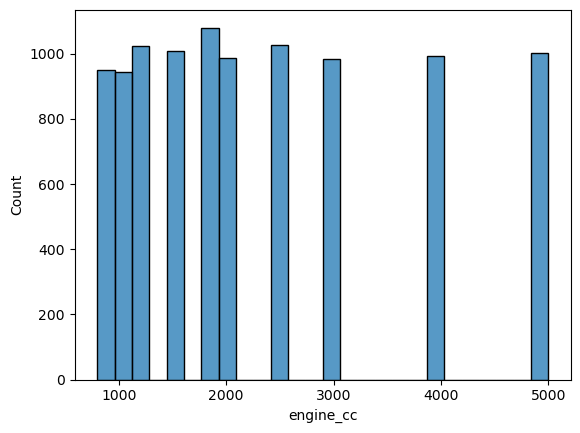

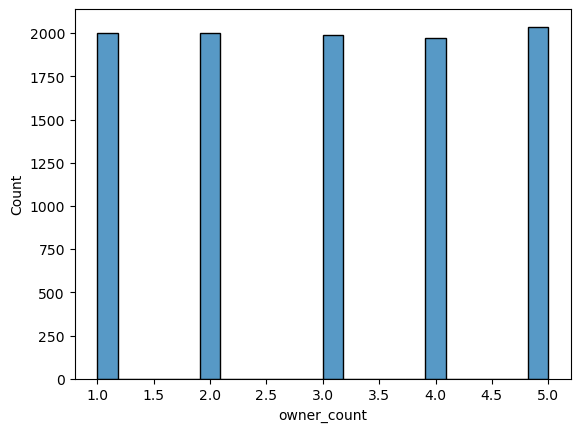

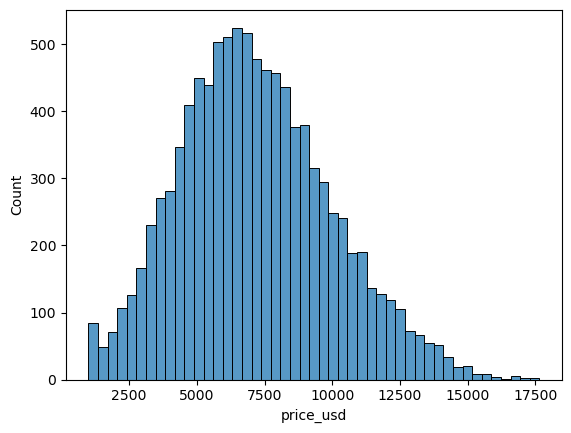

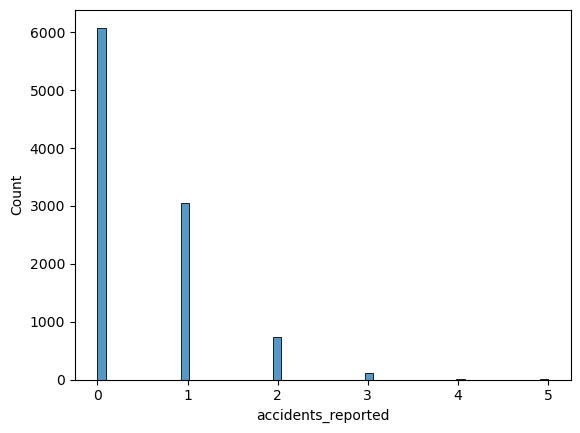

In [17]:
for i in (df.select_dtypes(exclude='object')):
    sns.histplot(data=df,x=i)
    plt.show()

In [18]:
## finding  the outliers 

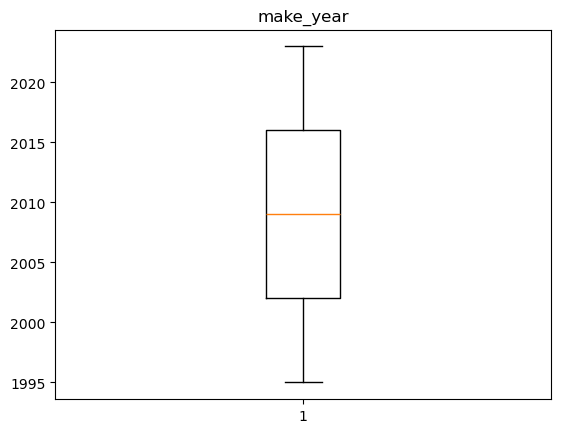

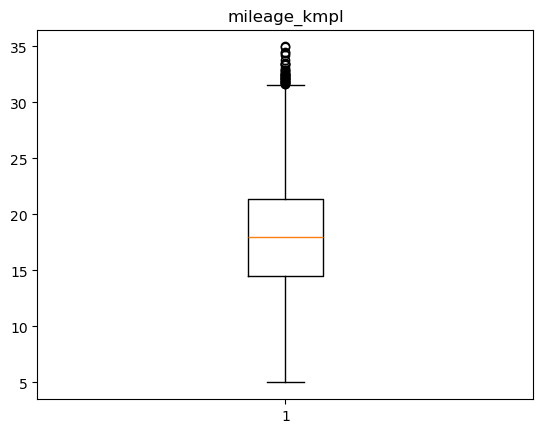

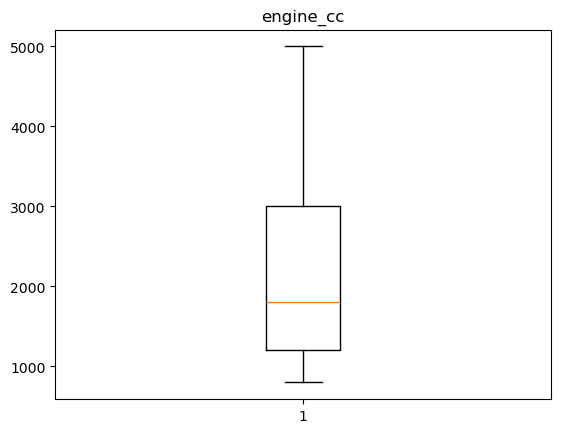

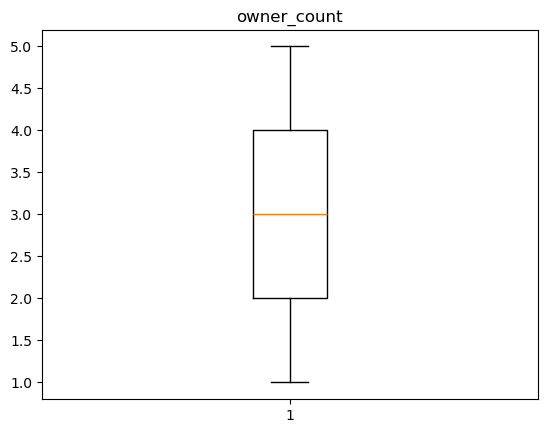

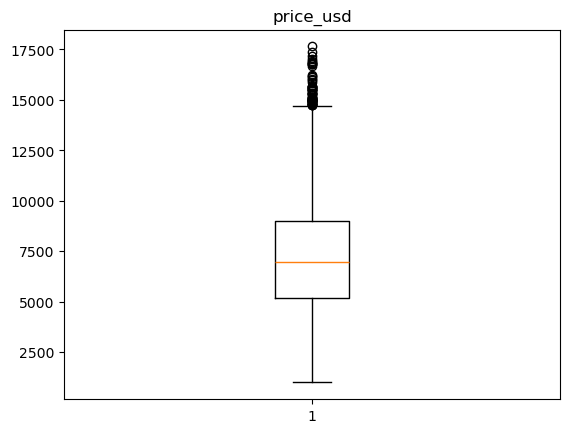

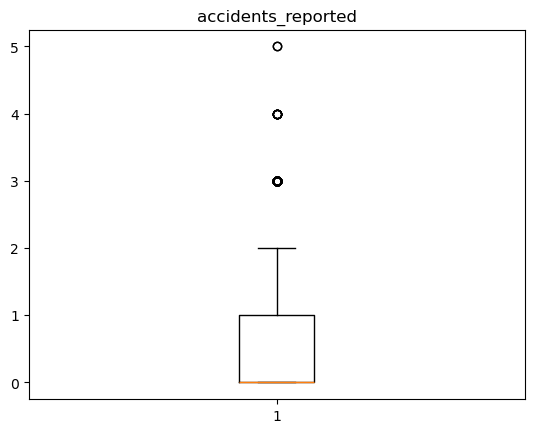

In [19]:
for i in (df.select_dtypes(exclude='object')):
    plt.boxplot(data=df,x=i)
    plt.title(i)
    plt.show()

In [20]:
# outlier treatment 

In [21]:
num=df.select_dtypes(exclude = 'object')

In [22]:
num

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
0,2001,8.17,4000,4,8587.64,0
1,2014,17.59,1500,4,5943.50,0
2,2023,18.09,2500,5,9273.58,1
3,2009,11.28,800,1,6836.24,0
4,2005,12.23,1000,2,4625.79,0
...,...,...,...,...,...,...
9995,1996,15.25,1500,2,5498.71,0
9996,1997,14.45,5000,1,9588.31,0
9997,2002,19.41,1000,4,4557.10,0
9998,2005,12.95,4000,5,7413.59,0


In [23]:
 def out_treat(x):
     q1 = x.quantile(0.25)
     q3 = x.quantile(0.75)
     iqr= q3-q1
     lc = q1-1.5*iqr
     uc = q3+1.5*iqr
     return x.clip(lower=lc , upper=uc)

In [24]:
num = num.apply(out_treat)

<Axes: >

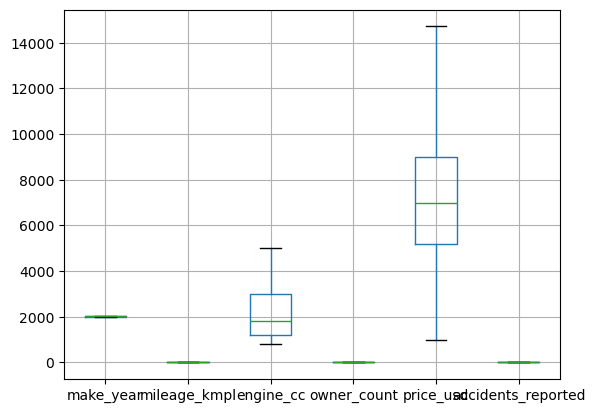

In [25]:
num.boxplot()

In [26]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Full,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Full,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [27]:
num.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
0,2001,8.17,4000,4,8587.64,0.0
1,2014,17.59,1500,4,5943.50,0.0
2,2023,18.09,2500,5,9273.58,1.0
3,2009,11.28,800,1,6836.24,0.0
4,2005,12.23,1000,2,4625.79,0.0


In [28]:
cat = df.select_dtypes(include = 'object')

In [29]:
cat

,fuel_type,brand,transmission,color,service_history,insurance_valid
0,Petrol,Chevrolet,Manual,White,Full,No
1,Petrol,Honda,Manual,Black,Full,Yes
2,Diesel,BMW,Automatic,Black,Full,Yes
3,Petrol,Hyundai,Manual,Blue,Full,Yes
4,Petrol,Nissan,Automatic,Red,Full,Yes
...,...,...,...,...,...,...
9995,Petrol,Hyundai,Manual,Silver,Full,Yes
9996,Diesel,Honda,Manual,Gray,Full,Yes
9997,Diesel,Kia,Manual,Black,Full,Yes
9998,Petrol,BMW,Automatic,Blue,Full,Yes


In [30]:
data = pd.concat([num,cat],axis=1)

In [31]:
data.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported,fuel_type,brand,transmission,color,service_history,insurance_valid
0,2001,8.17,4000,4,8587.64,0.0,Petrol,Chevrolet,Manual,White,Full,No
1,2014,17.59,1500,4,5943.50,0.0,Petrol,Honda,Manual,Black,Full,Yes
2,2023,18.09,2500,5,9273.58,1.0,Diesel,BMW,Automatic,Black,Full,Yes
3,2009,11.28,800,1,6836.24,0.0,Petrol,Hyundai,Manual,Blue,Full,Yes
4,2005,12.23,1000,2,4625.79,0.0,Petrol,Nissan,Automatic,Red,Full,Yes


In [32]:
data.shape

(10000, 12)

In [33]:
# data preprocessing

In [34]:
X = data.drop(['price_usd'],axis=1)

In [35]:
y = data['price_usd']

In [36]:
X.head()

,make_year,mileage_kmpl,engine_cc,owner_count,accidents_reported,fuel_type,brand,transmission,color,service_history,insurance_valid
0,2001,8.17,4000,4,0.0,Petrol,Chevrolet,Manual,White,Full,No
1,2014,17.59,1500,4,0.0,Petrol,Honda,Manual,Black,Full,Yes
2,2023,18.09,2500,5,1.0,Diesel,BMW,Automatic,Black,Full,Yes
3,2009,11.28,800,1,0.0,Petrol,Hyundai,Manual,Blue,Full,Yes
4,2005,12.23,1000,2,0.0,Petrol,Nissan,Automatic,Red,Full,Yes


In [37]:
y.head()

0    8587.64
1    5943.50
2    9273.58
3    6836.24
4    4625.79
Name: price_usd, dtype: float64

In [38]:
# Encoding

In [40]:
X.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'owner_count',
       'accidents_reported', 'fuel_type', 'brand', 'transmission', 'color',
       'service_history', 'insurance_valid'],
      dtype='object')

In [41]:
# Checking subcategories
print(X.fuel_type.value_counts())
print(X.service_history.value_counts())
print(X.owner_count.value_counts())
print(X.brand.value_counts())
print(X.transmission.value_counts())
print(X.color.value_counts())

fuel_type
Petrol      4968
Diesel      4058
Electric     974
Name: count, dtype: int64
service_history
Full       7025
Partial    2975
Name: count, dtype: int64
owner_count
5    2037
1    2003
2    2002
3    1989
4    1969
Name: count, dtype: int64
brand
Nissan        1089
Volkswagen    1033
BMW           1021
Tesla         1006
Honda         1003
Chevrolet      999
Hyundai        989
Toyota         956
Kia            955
Ford           949
Name: count, dtype: int64
transmission
Manual       5985
Automatic    4015
Name: count, dtype: int64
color
Gray      1705
Black     1702
Red       1678
White     1651
Blue      1634
Silver    1630
Name: count, dtype: int64


In [42]:
# observations 
 # the column

In [43]:
X =pd.get_dummies(data,columns=['fuel_type', 'brand', 'color'], drop_first = True)

In [44]:
X.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported,transmission,service_history,insurance_valid,fuel_type_Electric,...,brand_Kia,brand_Nissan,brand_Tesla,brand_Toyota,brand_Volkswagen,color_Blue,color_Gray,color_Red,color_Silver,color_White
0,2001,8.17,4000,4,8587.64,0.0,Manual,Full,No,False,...,False,False,False,False,False,False,False,False,False,True
1,2014,17.59,1500,4,5943.50,0.0,Manual,Full,Yes,False,...,False,False,False,False,False,False,False,False,False,False
2,2023,18.09,2500,5,9273.58,1.0,Automatic,Full,Yes,False,...,False,False,False,False,False,False,False,False,False,False
3,2009,11.28,800,1,6836.24,0.0,Manual,Full,Yes,False,...,False,False,False,False,False,True,False,False,False,False
4,2005,12.23,1000,2,4625.79,0.0,Automatic,Full,Yes,False,...,False,True,False,False,False,False,False,True,False,False


In [45]:
X = X.replace({True:1, False:0})

C:\Users\Chaitanya\AppData\Local\Temp\ipykernel_15828\525303183.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({True:1, False:0})


In [46]:
X.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported,transmission,service_history,insurance_valid,fuel_type_Electric,...,brand_Kia,brand_Nissan,brand_Tesla,brand_Toyota,brand_Volkswagen,color_Blue,color_Gray,color_Red,color_Silver,color_White
0,2001,8.17,4000,4,8587.64,0.0,Manual,Full,No,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,17.59,1500,4,5943.50,0.0,Manual,Full,Yes,0,...,0,0,0,0,0,0,0,0,0,0
2,2023,18.09,2500,5,9273.58,1.0,Automatic,Full,Yes,0,...,0,0,0,0,0,0,0,0,0,0
3,2009,11.28,800,1,6836.24,0.0,Manual,Full,Yes,0,...,0,0,0,0,0,1,0,0,0,0
4,2005,12.23,1000,2,4625.79,0.0,Automatic,Full,Yes,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
 - therer are three columns which contains ordinal data types 
    - transmission 
    - service_history
    - insurance_valid



In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [49]:
for i in ['transmission', 'service_history', 'insurance_valid']:
    X[i] = label_encoder.fit_transform(X[i])
    print(X)

      make_year  mileage_kmpl  engine_cc  owner_count  price_usd  \
0          2001          8.17       4000            4    8587.64   
1          2014         17.59       1500            4    5943.50   
2          2023         18.09       2500            5    9273.58   
3          2009         11.28        800            1    6836.24   
4          2005         12.23       1000            2    4625.79   
...         ...           ...        ...          ...        ...   
9995       1996         15.25       1500            2    5498.71   
9996       1997         14.45       5000            1    9588.31   
9997       2002         19.41       1000            4    4557.10   
9998       2005         12.95       4000            5    7413.59   
9999       2007         18.81       5000            1   11634.09   

      accidents_reported  transmission service_history insurance_valid  \
0                    0.0             1            Full              No   
1                    0.0           

In [50]:
X.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported,transmission,service_history,insurance_valid,fuel_type_Electric,...,brand_Kia,brand_Nissan,brand_Tesla,brand_Toyota,brand_Volkswagen,color_Blue,color_Gray,color_Red,color_Silver,color_White
0,2001,8.17,4000,4,8587.64,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,17.59,1500,4,5943.50,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2023,18.09,2500,5,9273.58,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2009,11.28,800,1,6836.24,0.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2005,12.23,1000,2,4625.79,0.0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [53]:
a = list(X.columns)

In [54]:
a

['make_year',
 'mileage_kmpl',
 'engine_cc',
 'owner_count',
 'price_usd',
 'accidents_reported',
 'transmission',
 'service_history',
 'insurance_valid',
 'fuel_type_Electric',
 'fuel_type_Petrol',
 'brand_Chevrolet',
 'brand_Ford',
 'brand_Honda',
 'brand_Hyundai',
 'brand_Kia',
 'brand_Nissan',
 'brand_Tesla',
 'brand_Toyota',
 'brand_Volkswagen',
 'color_Blue',
 'color_Gray',
 'color_Red',
 'color_Silver',
 'color_White']

In [51]:
# Scaling 

In [52]:
from sklearn.preprocessing import StandardScaler 

In [55]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
X

array([[-0.98011096, -1.95230016,  1.32655948, ..., -0.44903699,
        -0.4412971 ,  2.24876304],
       [ 0.57241709, -0.07310613, -0.60960538, ..., -0.44903699,
        -0.4412971 , -0.44468892],
       [ 1.6472442 ,  0.02663877,  0.16486057, ..., -0.44903699,
        -0.4412971 , -0.44468892],
       ...,
       [-0.86068572,  0.28996532, -0.99683835, ..., -0.44903699,
        -0.4412971 , -0.44468892],
       [-0.50241002, -0.99873886,  1.32655948, ..., -0.44903699,
        -0.4412971 , -0.44468892],
       [-0.26355955,  0.17027144,  2.10102542, ..., -0.44903699,
         2.26604707, -0.44468892]])

In [58]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.980111,-1.952300,1.326559,0.702338,0.508303,-0.726533,0.819051,-0.650759,-1.959661,-0.328497,...,-0.324936,-0.349583,-0.334443,-0.325124,-0.339412,-0.441944,-0.453371,-0.449037,-0.441297,2.248763
1,0.572417,-0.073106,-0.609605,0.702338,-0.442880,-0.726533,0.819051,-0.650759,0.510292,-0.328497,...,-0.324936,-0.349583,-0.334443,-0.325124,-0.339412,-0.441944,-0.453371,-0.449037,-0.441297,-0.444689
2,1.647244,0.026639,0.164861,1.407142,0.755058,0.773019,-1.220926,-0.650759,0.510292,-0.328497,...,-0.324936,-0.349583,-0.334443,-0.325124,-0.339412,-0.441944,-0.453371,-0.449037,-0.441297,-0.444689
3,-0.024709,-1.331887,-1.151732,-1.412076,-0.121733,-0.726533,0.819051,-0.650759,0.510292,-0.328497,...,-0.324936,-0.349583,-0.334443,-0.325124,-0.339412,2.262731,-0.453371,-0.449037,-0.441297,-0.444689
4,-0.502410,-1.142372,-0.996838,-0.707271,-0.916903,-0.726533,-1.220926,-0.650759,0.510292,-0.328497,...,-0.324936,2.860548,-0.334443,-0.325124,-0.339412,-0.441944,-0.453371,2.226988,-0.441297,-0.444689


In [59]:
X.columns=a

In [60]:
X.head()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported,transmission,service_history,insurance_valid,fuel_type_Electric,...,brand_Kia,brand_Nissan,brand_Tesla,brand_Toyota,brand_Volkswagen,color_Blue,color_Gray,color_Red,color_Silver,color_White
0,-0.980111,-1.952300,1.326559,0.702338,0.508303,-0.726533,0.819051,-0.650759,-1.959661,-0.328497,...,-0.324936,-0.349583,-0.334443,-0.325124,-0.339412,-0.441944,-0.453371,-0.449037,-0.441297,2.248763
1,0.572417,-0.073106,-0.609605,0.702338,-0.442880,-0.726533,0.819051,-0.650759,0.510292,-0.328497,...,-0.324936,-0.349583,-0.334443,-0.325124,-0.339412,-0.441944,-0.453371,-0.449037,-0.441297,-0.444689
2,1.647244,0.026639,0.164861,1.407142,0.755058,0.773019,-1.220926,-0.650759,0.510292,-0.328497,...,-0.324936,-0.349583,-0.334443,-0.325124,-0.339412,-0.441944,-0.453371,-0.449037,-0.441297,-0.444689
3,-0.024709,-1.331887,-1.151732,-1.412076,-0.121733,-0.726533,0.819051,-0.650759,0.510292,-0.328497,...,-0.324936,-0.349583,-0.334443,-0.325124,-0.339412,2.262731,-0.453371,-0.449037,-0.441297,-0.444689
4,-0.502410,-1.142372,-0.996838,-0.707271,-0.916903,-0.726533,-1.220926,-0.650759,0.510292,-0.328497,...,-0.324936,2.860548,-0.334443,-0.325124,-0.339412,-0.441944,-0.453371,2.226988,-0.441297,-0.444689


In [63]:
from sklearn.model_selection import train_test_split

In [62]:
# Data Splitting for Train and Test 

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=9)

In [65]:
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 25) (8000,)
(2000, 25) (2000,)


## model building 

In [69]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [72]:
# predictions on training data 
model.predict(X_train)

array([7682.25, 3727.01, 7741.04, ..., 6577.07, 7720.53, 2852.95])

In [73]:
result_train = pd.DataFrame()
result_train['actual']= y_train
result_train['prediction']= model.predict(X_train)
result_train['residual']= result_train['actual'] - result_train['prediction']
result_train

,actual,prediction,residual
9394,7682.25,7682.25,1.818989e-12
50,3727.01,3727.01,6.821210e-12
2884,7741.04,7741.04,5.456968e-12
1183,8894.32,8894.32,-3.637979e-12
2077,5930.04,5930.04,3.637979e-12
...,...,...,...
6200,14117.03,14117.03,1.818989e-12
501,3864.02,3864.02,3.637979e-12
6782,6577.07,6577.07,0.000000e+00
4444,7720.53,7720.53,9.094947e-13


In [84]:
from sklearn.metrics import r2_score,mean_squared_error 
import scipy.stats as stats 

In [85]:
score_train = r2_score(y_train,result_train['prediction'])

In [86]:
score_train

1.0

In [87]:
result_test = pd.DataFrame()
result_test['actual']= y_test
result_test['prediction']= model.predict(X_test)
result_test['residual']= result_test['actual'] - result_test['prediction']
result_test

,actual,prediction,residual
3644,9048.64,9048.64,-1.818989e-12
9184,7391.98,7391.98,-3.637979e-12
520,4147.26,4147.26,9.094947e-12
5685,9984.30,9984.30,-7.275958e-12
2401,6515.27,6515.27,-9.094947e-13
...,...,...,...
6212,12977.20,12977.20,-1.091394e-11
9309,7288.66,7288.66,-9.094947e-13
7055,5400.52,5400.52,1.818989e-12
4388,10148.47,10148.47,-1.818989e-12


In [88]:
score_test = r2_score(y_test,result_test['prediction'])

In [89]:
score_test

1.0

In [90]:
mse_train= mean_squared_error(y_train,result_train['prediction'])

In [91]:
mse_train

3.605605165316922e-23

In [92]:
mse_test = mean_squared_error(y_test,result_test['prediction'])

In [93]:
mse_test

3.7103916621450575e-23

Text(0.5, 1.0, 'Q-Q Plot for residual Normality Check')

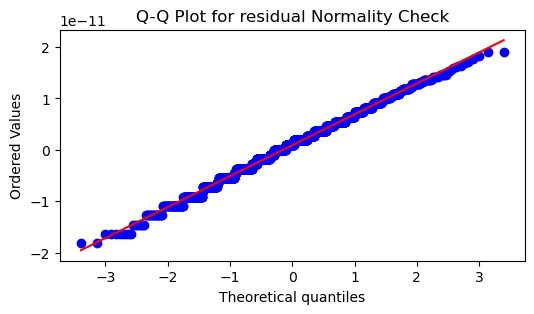

In [94]:
plt.figure(figsize=(6,3))
stats.probplot(result_test['residual'],dist="norm", plot=plt)
plt.title("Q-Q Plot for residual Normality Check")

C:\Users\Chaitanya\AppData\Local\Temp\ipykernel_15828\28179505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result_test['prediction'])


<Axes: xlabel='prediction', ylabel='Density'>

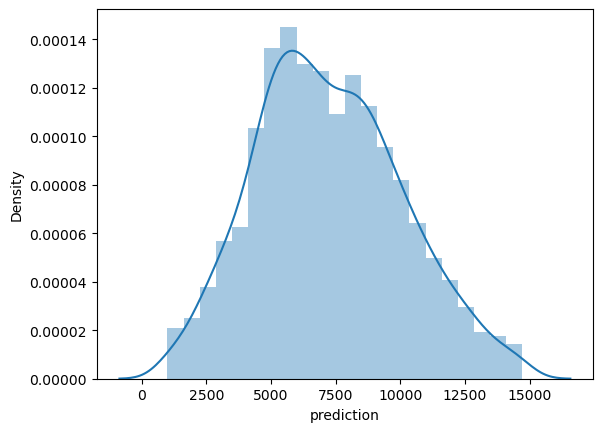

In [95]:
sns.distplot(result_test['prediction'])

In [96]:
# conclusion 